## Compare Men's and Women's World Record Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import numpy as np

SWIMMING_FILE_NAME = "World Record Comparison - Swimming.csv"
TRACK_FILE_NAME = "World Record Comparison - Track.csv"

In [2]:
track_df = pd.read_csv(TRACK_FILE_NAME)
swimming_df = pd.read_csv(SWIMMING_FILE_NAME)

In [3]:
def get_canonical_value(time_string):
    if ":" not in time_string:
        return float(time_string)
    else:
        total = float(0)
        done = False
        while not done:
            found = time_string.find(":")
            if found > 0:
                value = time_string[0:found]
                total = (total + float(value)) * 60
                time_string = time_string[found+1:]
            else:
                total = total + float(time_string)
                done = True
        return total

def process_results(df):
    diff_column = np.zeros(len(df))
    pct_column = np.zeros(len(df))
    for row in df.iterrows():
        index = row[0]
        mens_result = get_canonical_value(row[1]['Men'])
        womens_result = get_canonical_value(row[1]['Women'])
        diff = abs(mens_result - womens_result)
        pct = diff / mens_result * 100
        diff_column[index] = diff
        pct_column[index] = pct
    df['Diff'] = diff_column
    df['Pct'] = pct_column
    return df


In [4]:
process_results(swimming_df)
sorted_swimming_df = swimming_df.sort_values(by=['Pct'], ascending=False)
sorted_swimming_df

,Event,Men,Women,Distance,Diff,Pct
6,50m backstroke,23.55,26.86,50,3.31,14.055202
0,50m freestyle,20.91,23.61,50,2.70,12.912482
10,100m breaststroke,56.88,1:04.13,100,7.25,12.746132
9,50m breaststroke,25.95,29.16,50,3.21,12.369942
13,100m butterfly,49.45,55.48,100,6.03,12.194135
19,4 × 100 m medley relay,3:26.78,3:50.40,400,23.62,11.422768
7,100m backstroke,51.6,57.33,100,5.73,11.104651
2,200m freestyle,1:42.00,1:52.85,200,10.85,10.637255
15,200m individual medley,1:54.00,2:06.12,200,12.12,10.631579
1,100m freestyle,46.8,51.71,100,4.91,10.491453


In [5]:
process_results(track_df)
sorted_track_df = track_df.sort_values(by=['Pct'], ascending=False)
sorted_track_df

,Event,Men,Women,Distance,Diff,Pct
27,Pole Vault,6.23,5.06,0,1.17,18.780096
28,Long Jump,8.95,7.52,0,1.43,15.977654
26,High Jump,2.45,2.09,0,0.36,14.693878
47,Distance Medley,9:15.50,10:36.50,4000,81.00,14.581458
48,4x1500 Metres Relay,14:22.22,16:27.02,6000,124.80,14.474264
29,Triple Jump,18.29,15.74,0,2.55,13.942045
15,2000 Metres,4:43.13,5:21.56,2000,38.43,13.573270
35,50 Kilometres Road,2:38:43,2:59:54,50000,1271.00,13.346634
9,1000 Metres,2:11.96,2:28.98,1000,17.02,12.897848
8,800 Metres Short Track,1:42.67,1:55.82,800,13.15,12.808026


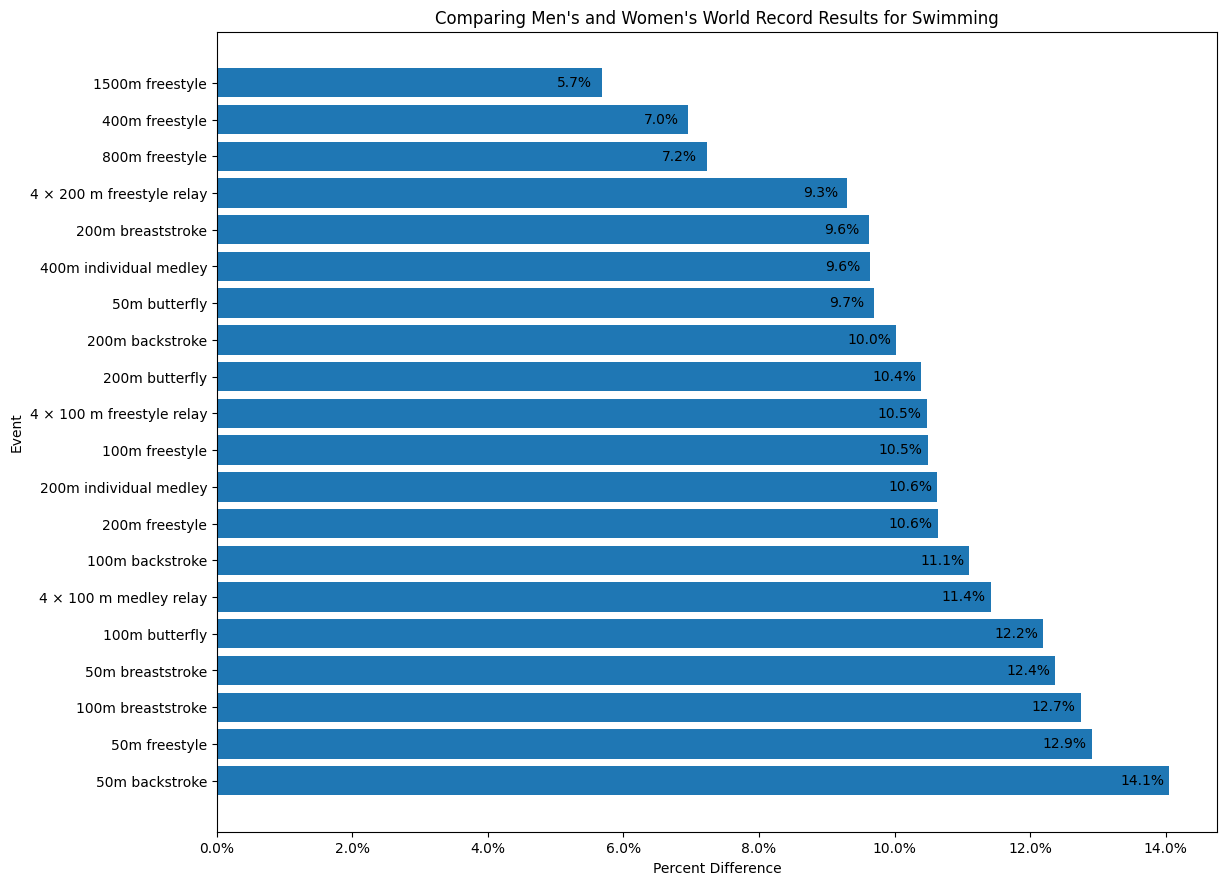

In [18]:
fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Comparing Men\'s and Women\'s World Record Results for Swimming')
ax.barh(sorted_swimming_df['Event'],sorted_swimming_df['Pct'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Percent Difference')
plt.ylabel('Event')
values = sorted_swimming_df['Pct']
i = 0
for index, row in sorted_swimming_df.iterrows():
    plt.text(row['Pct'] - 0.4, i - 0.1,  "{:.1f}%".format(row['Pct']), ha='center')
    i += 1
plt.show()


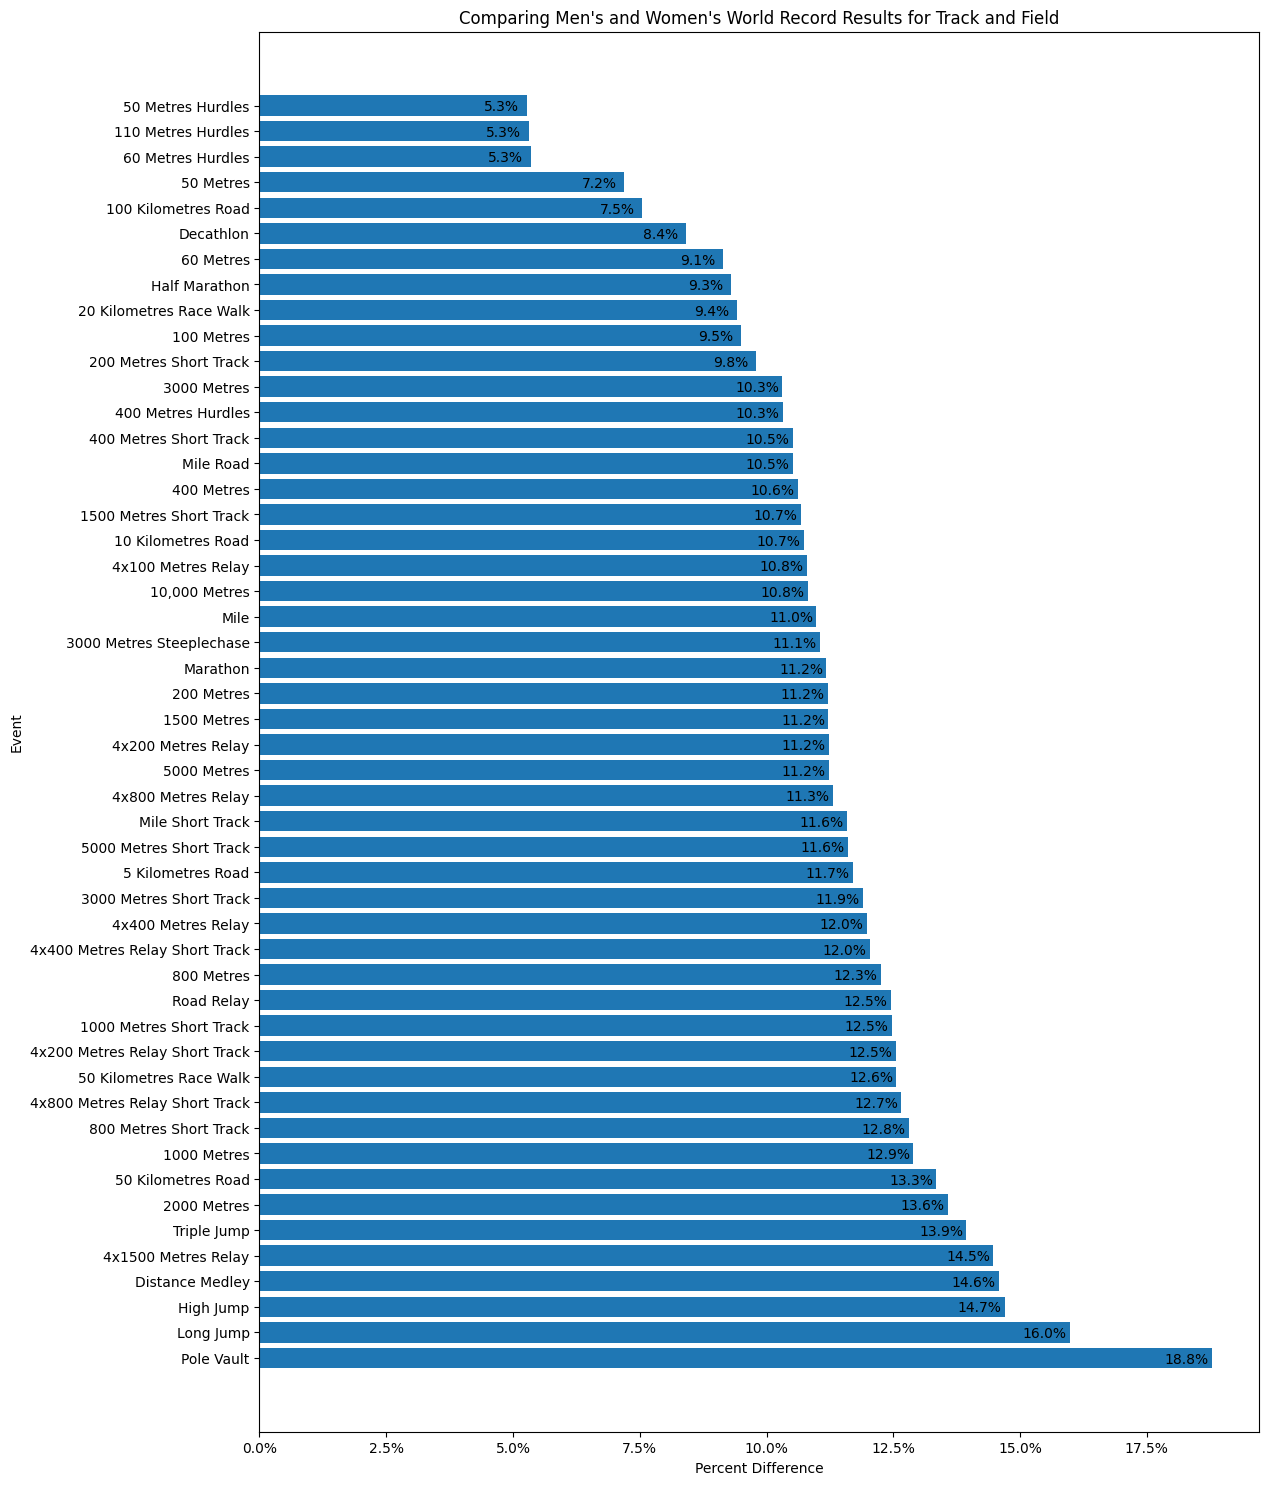

In [28]:
fig = plt.figure(figsize=(10.0,14.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Comparing Men\'s and Women\'s World Record Results for Track and Field')
ax.barh(sorted_track_df['Event'],sorted_track_df['Pct'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Percent Difference')
plt.ylabel('Event')
values = sorted_track_df['Pct']
i = 0
for index, row in sorted_track_df.iterrows():
    plt.text(row['Pct'] - 0.5, i - 0.2,  "{:.1f}%".format(row['Pct']), ha='center')
    i += 1
plt.show()